In [100]:
!pip install tensorflow


In [101]:
!pip install matplotlib


In [102]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [103]:
Image_Size=256
Batch_Size=32
Chanels=3 #RGB

In [104]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDis",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size = Batch_Size
)

Found 2152 files belonging to 3 classes.


In [105]:
class_names = dataset.class_names
class_names #Folder Names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [106]:
len(dataset) #68=dataset lenth each of size 32


68

In [107]:
for image_batch, label_batch in dataset.take(1):
   
    print(image_batch[0])

tf.Tensor(
[[[114. 101. 108.]
  [ 96.  83.  90.]
  [104.  91.  98.]
  ...
  [186. 179. 186.]
  [184. 177. 184.]
  [182. 175. 182.]]

 [[123. 110. 117.]
  [139. 126. 133.]
  [140. 127. 134.]
  ...
  [182. 175. 182.]
  [181. 174. 181.]
  [181. 174. 181.]]

 [[139. 126. 133.]
  [115. 102. 109.]
  [142. 129. 136.]
  ...
  [179. 172. 179.]
  [180. 173. 180.]
  [182. 175. 182.]]

 ...

 [[114. 102. 114.]
  [130. 118. 130.]
  [157. 145. 157.]
  ...
  [159. 153. 165.]
  [157. 151. 163.]
  [158. 152. 164.]]

 [[125. 113. 125.]
  [120. 108. 120.]
  [109.  97. 109.]
  ...
  [160. 154. 166.]
  [159. 153. 165.]
  [161. 155. 167.]]

 [[142. 130. 142.]
  [137. 125. 137.]
  [106.  94. 106.]
  ...
  [160. 154. 166.]
  [160. 154. 166.]
  [164. 158. 170.]]], shape=(256, 256, 3), dtype=float32)


Text(0.5, 1.0, 'Potato___Early_blight')

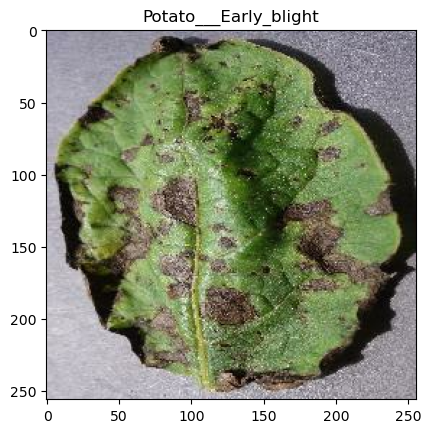

In [108]:
plt.imshow(image_batch[1].numpy().astype("uint8"))
plt.title(class_names[label_batch[1]])#for type of batch


In [109]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [110]:
train_size=0.8
len(dataset)*train_size#No.of training batches

54.400000000000006

In [111]:
train_ds= dataset.take(54)
len(train_ds)

54

In [112]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [113]:
val_size=0.1
len(dataset)*val_size #No. of validation batches

6.800000000000001

In [114]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [115]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [116]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=4)
        
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
#Function for splitting test train and validation ds

In [117]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [118]:
len(train_ds)

54

In [119]:
len(val_ds)

6

In [120]:
len(test_ds)

8

In [121]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#cache shuffling and prefetch for fast processing

In [122]:
#for preprocessing - resizing and rescaling
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(Image_Size, Image_Size),
    Rescaling(1.0/255)
])


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast

data_augmentation = Sequential([
    RandomFlip("horizontal"),      # or "vertical", or "horizontal_and_vertical"
    RandomRotation(0.1),           # ±10% of 360°
    RandomContrast(0.1)            # ±10% contrast variation
])


In [124]:
import tensorflow as tf
from tensorflow.keras import layers, models

Image_Size = 256
Chanels = 3


input_shape = (Image_Size, Image_Size, Chanels)

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])



In [125]:
model.build(input_shape=(None, Image_Size, Image_Size, Chanels))


In [126]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,979 (2.50 MB)

 Trainable params: 654,979 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [128]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=18,
    batch_size = Batch_Size,
    verbose=1
)

Epoch 1/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5133 - loss: 0.8968 - val_accuracy: 0.6250 - val_loss: 0.8801
Epoch 2/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8090 - loss: 0.5329 - val_accuracy: 0.8073 - val_loss: 0.4459
Epoch 3/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8756 - loss: 0.3370 - val_accuracy: 0.9010 - val_loss: 0.2518
Epoch 4/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9207 - loss: 0.2274 - val_accuracy: 0.9062 - val_loss: 0.1742
Epoch 5/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9392 - loss: 0.1658 - val_accuracy: 0.9479 - val_loss: 0.1191
Epoch 6/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9462 - loss: 0.1351 - val_accuracy: 0.9479 - val_loss: 0.1270
Epoch 7/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9277 - loss: 0.1758 - val_accuracy: 0.9688 - val_loss: 0.1188
Epoch 8/18
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9468 - loss: 0.1413 - val_accuracy: 0.8854 - val_loss

In [129]:
 scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 472ms/step - accuracy: 0.9648 - loss: 0.0610


In [130]:
scores

[0.06103530526161194, 0.96484375]

In [131]:
history.params

{'verbose': 1, 'epochs': 18, 'steps': 54}

In [132]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

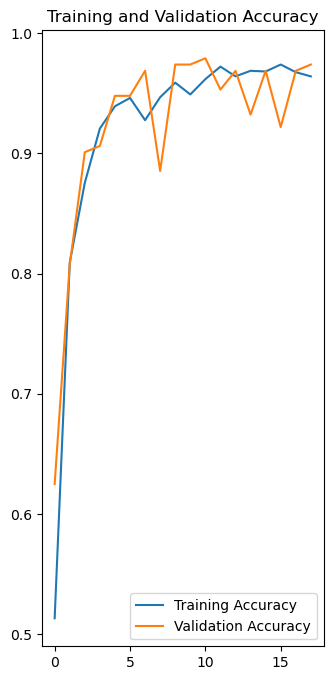

In [134]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(18), acc, label='Training Accuracy')
plt.plot(range(18), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



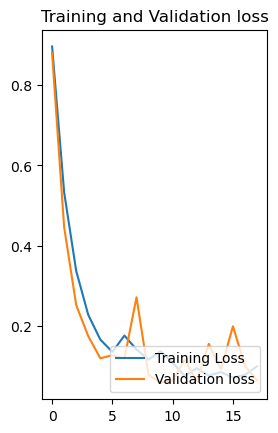

In [135]:
plt.subplot(1, 2, 1)
plt.plot(range(18), loss, label='Training Loss')
plt.plot(range(18), val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

First image to predict
First image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
First image predicted label: Potato___Early_blight


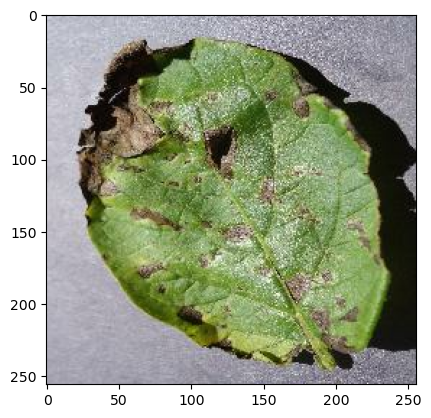

In [136]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label:", class_names[first_label])

    model.prediction = model.predict(image_batch)
    print("First image predicted label:", class_names[tf.argmax(model.prediction[0])])

In [137]:
def predict(model, img):
    img_array = tf.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = round(100 * tf.reduce_max(predictions[0]).numpy(), 2)
    return predicted_class, confidence

                              

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


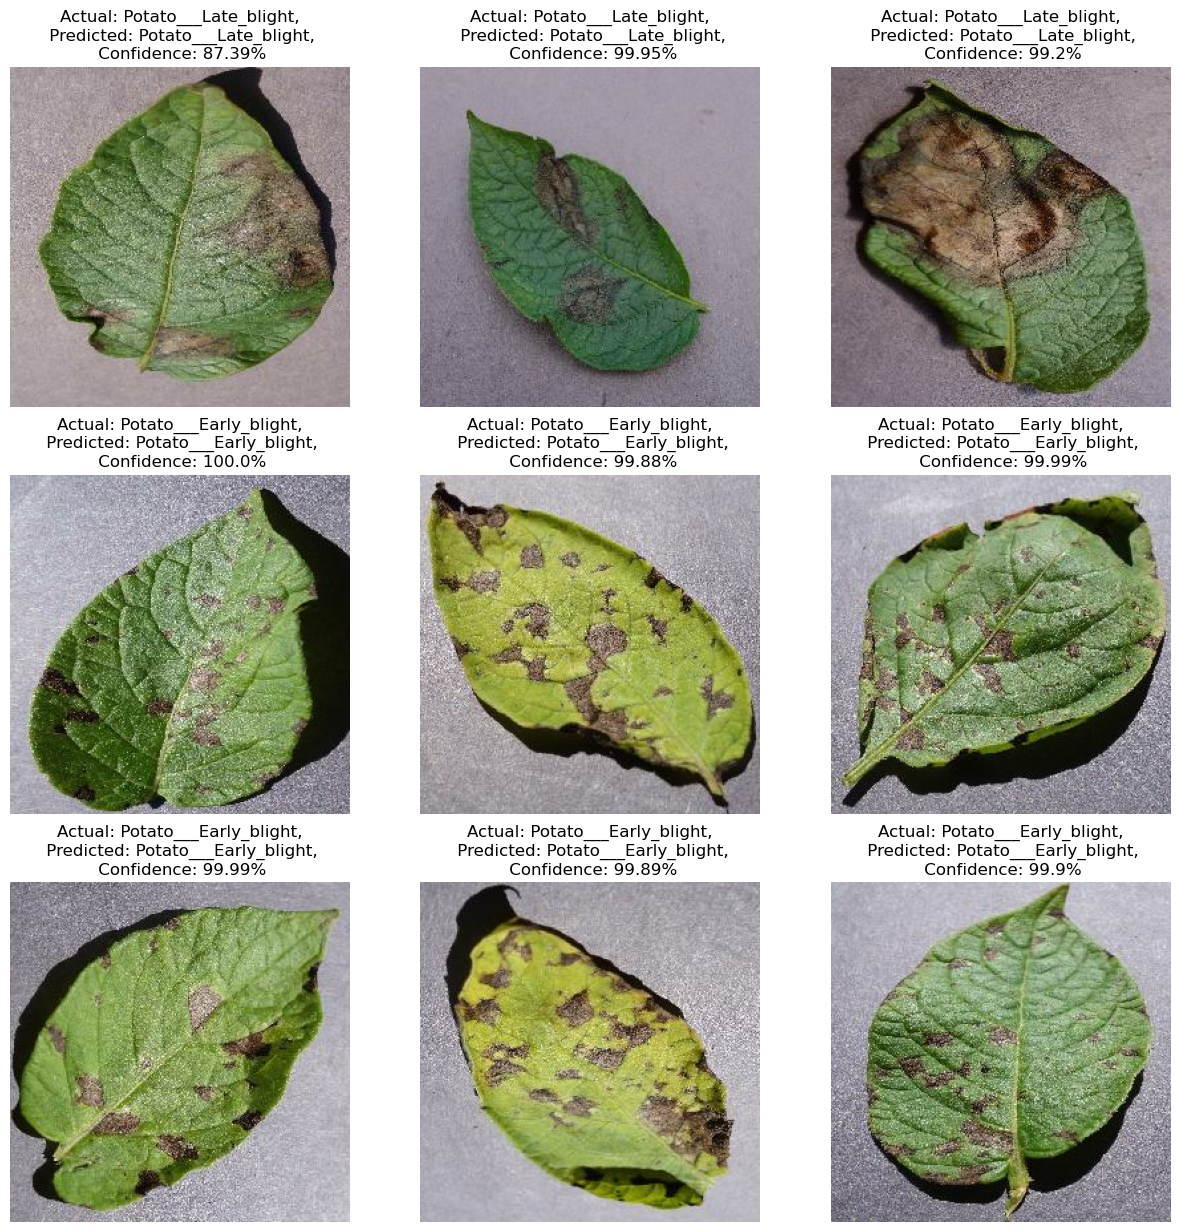

In [138]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
     for i in range(9):
         ax = plt.subplot(3, 3, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         predicted_class, confidence = predict(model, images[i].numpy())
         actual_class = class_names[labels[i]]

         plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
         plt.axis("off")
         

In [139]:
model_version = 1
model.save(f"../models/model_{model_version}.keras") ##Saving the model
